# Import Librarynya terlebih dahulu

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca Dataset

In [197]:
data = pd.read_csv("Data.csv")

# membersihkan data
data['Original Price'] = data['Original Price'].replace({'': np.nan, '[.]': ''}, regex=True)
data['Original Price'] = pd.to_numeric(data['Original Price'], errors='coerce')
data['Selling Price'] = pd.to_numeric(data['Selling Price'], errors='coerce')

/var/folders/y9/mspx7swj0rn_0ppnxq9mq1880000gn/T/ipykernel_24093/3704909454.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Data.csv")


# EDA

In [198]:
data.head()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000.0,0,231000,1.490.322.581,0,0
1,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800.0,0,218800,1.411.612.903,0,0
2,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000.0,0,227000,1.464.516.129,0,0
3,"Oct 22, 2022","Oct 22, 2022",TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000.0,0,263000,1.696.774.194,0,0
4,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000.0,0,236000,1.522.580.645,0,0


In [199]:
data = data.dropna()

In [200]:
data.info()
data.describe()
data.isnull()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 32770 entries, 0 to 32771
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            32770 non-null  object 
 1   Last Crawling   32770 non-null  object 
 2   SKU Name        32770 non-null  object 
 3   Product Name    32770 non-null  object 
 4   Url Product     32770 non-null  object 
 5   Seller          32770 non-null  object 
 6   Merchant        32770 non-null  object 
 7   Stock           32770 non-null  object 
 8   Item Condition  32770 non-null  object 
 9   Filter          32770 non-null  object 
 10  Flag            32770 non-null  object 
 11  Bottom Price    32770 non-null  int64  
 12  Original Price  32770 non-null  float64
 13  Discount        32770 non-null  object 
 14  Selling Price   32770 non-null  int64  
 15  Discrepancy     32770 non-null  object 
 16  Sales Quantity  32770 non-null  int64  
 17  Sales Revenue   32770 non-null  int6

Date              0
Last Crawling     0
SKU Name          0
Product Name      0
Url Product       0
Seller            0
Merchant          0
Stock             0
Item Condition    0
Filter            0
Flag              0
Bottom Price      0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64

# Mencari Korelasi

In [201]:
corr = data['Original Price'].corr(data['Selling Price'])
print(corr)

X = data[['Original Price']].values
y = data['Selling Price'].values

# Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian
train_size = int(0.8 * len(X))
X_train, X_test = X[train_size], X[train_size]
y_train, y_test = y[train_size], y[train_size]

-0.007608238863056572


# Mencari intercept dan slope

In [202]:
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

slope = np.sum((X_train - X_mean) * (y_train - y_mean)) / np.sum((X_train - X_mean) ** 2)
intercept = y_mean - slope * X_mean
y_pred = slope * X_test + intercept
print(f'Slope: {slope}, Intercept: {intercept}')

Slope: nan, Intercept: nan


/var/folders/y9/mspx7swj0rn_0ppnxq9mq1880000gn/T/ipykernel_24093/516264319.py:4: RuntimeWarning: invalid value encountered in scalar divide
  slope = np.sum((X_train - X_mean) * (y_train - y_mean)) / np.sum((X_train - X_mean) ** 2)


Text(0, 0.5, 'Selling Price')

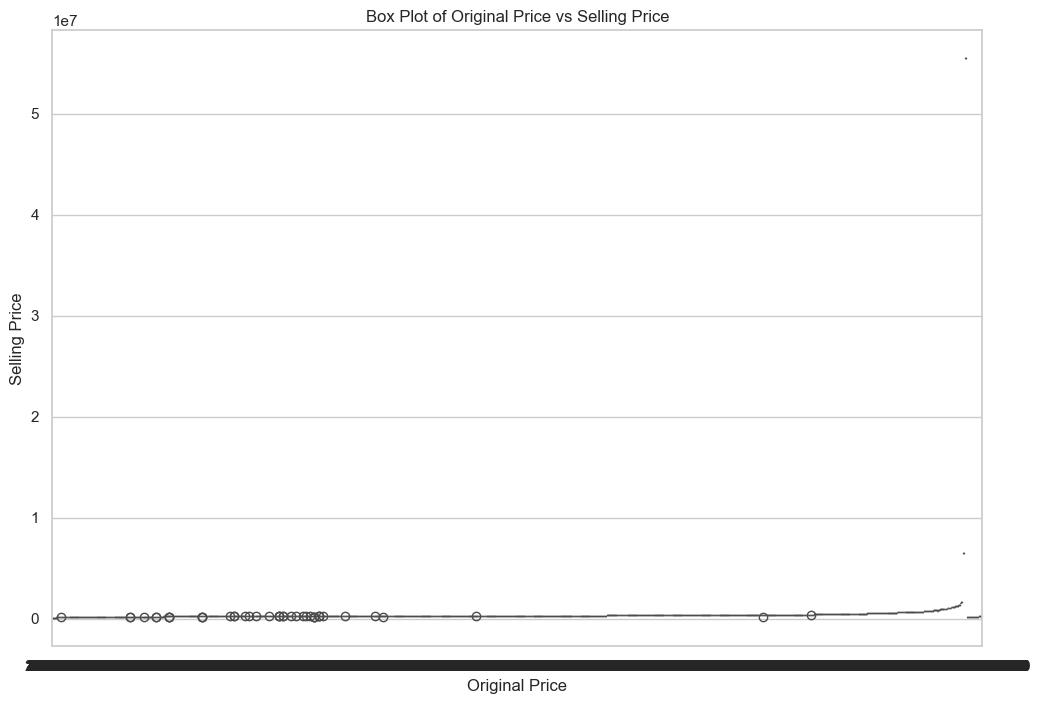

In [203]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Original Price', y='Selling Price', data=data)
plt.title("Box Plot of Original Price vs Selling Price")
plt.xlabel("Original Price")
plt.ylabel("Selling Price")

# Error

In [205]:
error = y_test - y_pred.flatten()
error

array([  1718.79459109, -13631.20540891,  16318.79459109, ...,
         1551.79459109, -60181.20540891,   4718.79459109])

# MSE dan Square-error

In [188]:
mse = np.mean((y_test - y_pred) ** 2)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): nan
R-squared: nan


# Mencari Prediksi yg Akurat

In [ ]:
test_predict_y = intercept + slope * X_test

predict_selling = pd.DataFrame({
    "Original Price": X_test.flatten(), # membentuk ulang array dan menyederhanakan array
    "Selling Price": y_test,
    "Prediksi Selling Price": test_predict_y.flatten().round() #-> membulatkan ke angka floating 
})
print("Prediksi Dari Selling Price\n", predict_selling)

Prediksi Dari Selling Price
       Original Price  Selling Price  Prediksi Selling Price
0           271900.0         271900                270181.0
1           256550.0         256550                270181.0
2           286500.0         286500                270181.0
3           263724.0         263724                270181.0
4           231000.0         231000                270181.0
...              ...            ...                     ...
6549        244000.0         244000                270181.0
6550        212000.0         212000                270181.0
6551        271733.0         271733                270181.0
6552        210000.0         210000                270181.0
6553        274900.0         274900                270181.0

[6554 rows x 3 columns]


Text(0, 0.5, 'Selling Price')

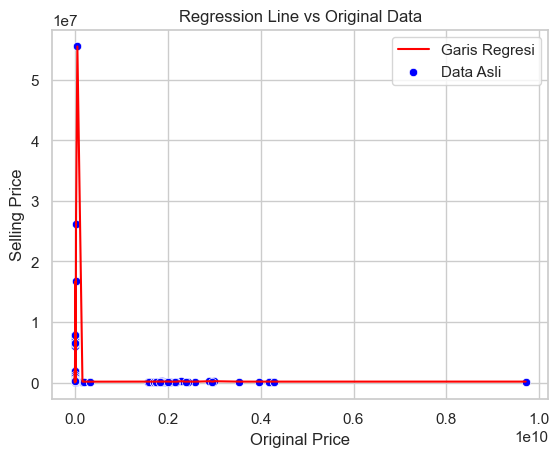

In [165]:
sns.lineplot(x='Original Price', y='Selling Price', data=data, color='red', label="Garis Regresi")
sns.scatterplot(x='Original Price', y='Selling Price', data=data, color='blue', label="Data Asli")
plt.title("Regression Line vs Original Data")
plt.xlabel("Original Price")
plt.ylabel("Selling Price")

/var/folders/y9/mspx7swj0rn_0ppnxq9mq1880000gn/T/ipykernel_24093/640515943.py:6: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"/Users/mac/Downloads/Data - Data.csv.csv")


<class 'pandas.core.frame.DataFrame'>
Index: 32770 entries, 0 to 32771
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            32770 non-null  object 
 1   Last Crawling   32770 non-null  object 
 2   SKU Name        32770 non-null  object 
 3   Product Name    32770 non-null  object 
 4   Url Product     32770 non-null  object 
 5   Seller          32770 non-null  object 
 6   Merchant        32770 non-null  object 
 7   Stock           32770 non-null  object 
 8   Item Condition  32770 non-null  object 
 9   Filter          32770 non-null  object 
 10  Flag            32770 non-null  object 
 11  Bottom Price    32770 non-null  int64  
 12  Original Price  32770 non-null  float64
 13  Discount        32770 non-null  object 
 14  Selling Price   32770 non-null  int64  
 15  Discrepancy     32770 non-null  object 
 16  Sales Quantity  32770 non-null  int64  
 17  Sales Revenue   32770 non-null  int6

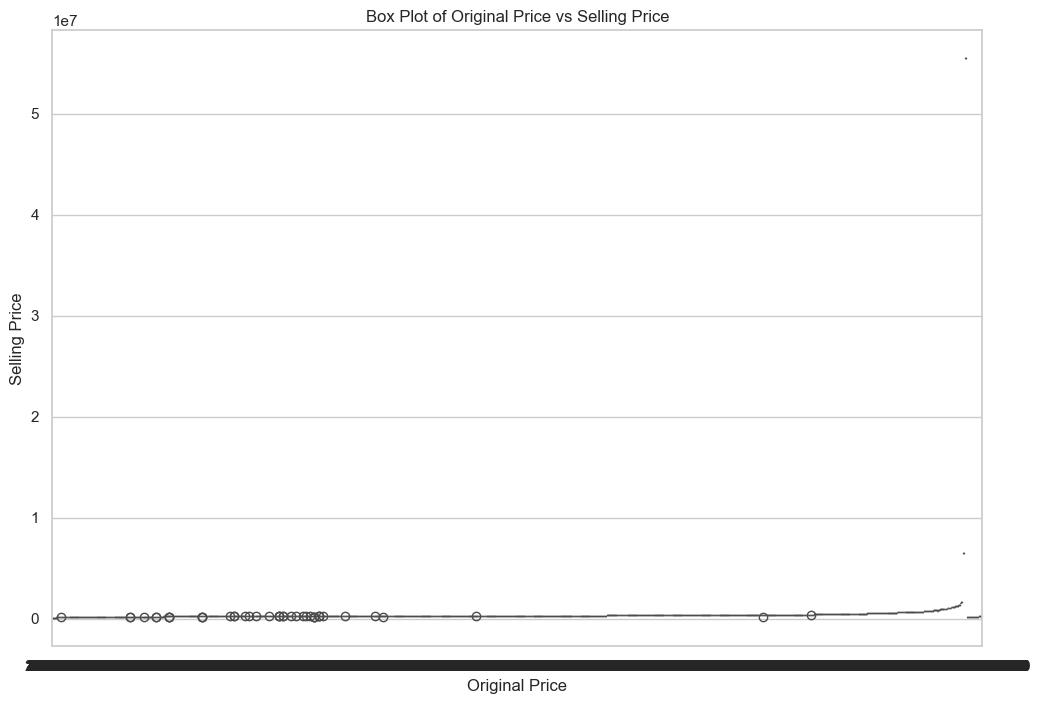

Mean Squared Error (MSE): 35408832456.01316
R-squared: -6569.968919604573
Persamaan regresi linier: y = -0.00 * x + 270181.21 + e


/var/folders/y9/mspx7swj0rn_0ppnxq9mq1880000gn/T/ipykernel_24093/640515943.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


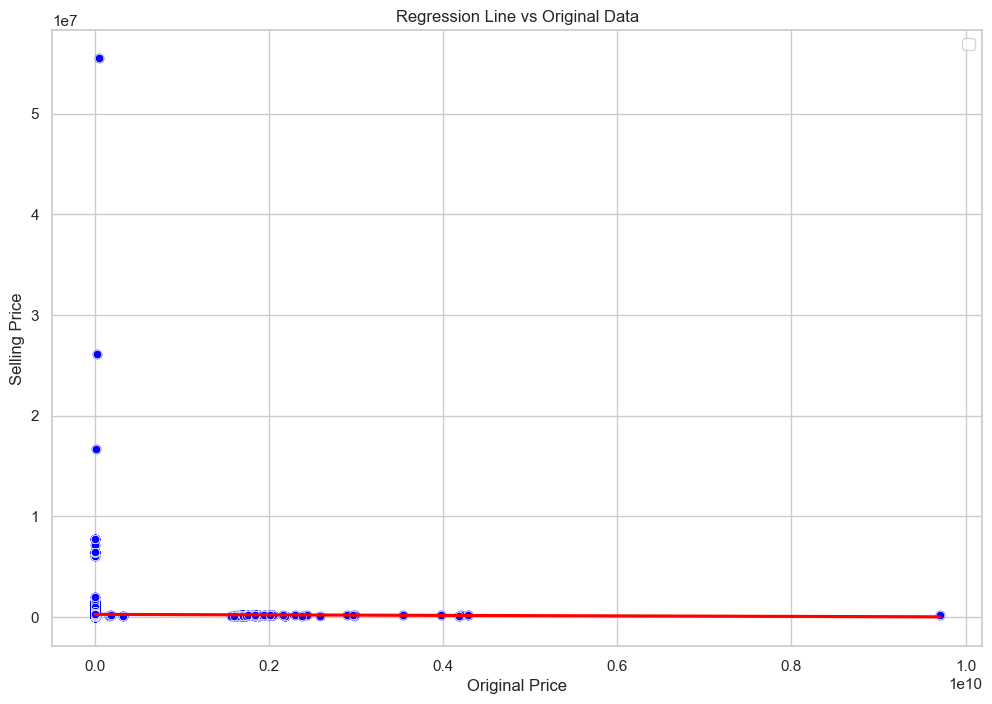

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r"/Users/mac/Downloads/Data - Data.csv.csv")


# membersihkan data
data['Original Price'] = data['Original Price'].replace({'': np.nan, '[.]': ''}, regex=True)
data['Original Price'] = pd.to_numeric(data['Original Price'], errors='coerce')
data['Selling Price'] = pd.to_numeric(data['Selling Price'], errors='coerce')

data.head()
data = data.dropna()
data.info()
data.describe()
data.isnull()
data.isnull().sum()

corr = data['Original Price'].corr(data['Selling Price'])
print(corr)

X = data[['Original Price']].values
y = data['Selling Price'].values

# Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

slope = np.sum((X_train - X_mean) * (y_train - y_mean)) / np.sum((X_train - X_mean) ** 2)
intercept = y_mean - slope * X_mean
y_pred = slope * X_test + intercept
print(f'Slope: {slope}, Intercept: {intercept}')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Original Price', y='Selling Price', data=data)
plt.title("Box Plot of Original Price vs Selling Price")
plt.xlabel("Original Price")
plt.ylabel("Selling Price")
plt.show()

error = y_test - y_pred.flatten()
mse = np.mean((y_test - y_pred) ** 2)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")
print(f"Persamaan regresi linier: y = {slope:.2f} * x + {intercept:.2f} + e")
test_predict_y = intercept + slope * X_test

predict_selling = pd.DataFrame({
    "Original Price": X_test.flatten(),
    "Selling Price": y_test,
    "Prediksi Selling Price": test_predict_y.flatten().round()
})
plt.figure(figsize=(12, 8))
sns.regplot(x='Original Price', y='Selling Price', data=data, color='blue', line_kws={'color': 'red'})
sns.scatterplot(x='Original Price', y='Selling Price', data=data, color='blue')
plt.title("Regression Line vs Original Data")
plt.xlabel("Original Price")
plt.ylabel("Selling Price")
plt.legend()
plt.show()



In [194]:
print(f"Nilai Korelasi: {corr}")

Nilai Korelasi: -0.007608238863056572


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv(r"/Users/mac/Downloads/Data - Data.csv.csv")

# Membersihkan data
data['Original Price'] = data['Original Price'].replace({'': np.nan, '[.]': ''}, regex=True)
data['Original Price'] = pd.to_numeric(data['Original Price'], errors='coerce')
data['Selling Price'] = pd.to_numeric(data['Selling Price'], errors='coerce')

# Melihat data
data.head()
data = data.dropna()
data.info()
data.describe()
data.isnull()
data.isnull().sum()

# Menghitung korelasi antara 'Original Price' dan 'Selling Price'
corr = data['Original Price'].corr(data['Selling Price'])
print(f"Korelasi antara 'Original Price' dan 'Selling Price': {corr}")

# Menyusun variabel independen dan dependen
X = data[['Original Price']].values
y = data['Selling Price'].values

# Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menghitung rata-rata X dan Y pada data pelatihan
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

# Menghitung slope dan intercept untuk regresi linear
slope = np.sum((X_train - X_mean) * (y_train - y_mean)) / np.sum((X_train - X_mean) ** 2)
intercept = y_mean - slope * X_mean
y_pred = slope * X_test + intercept
print(f'Slope: {slope}, Intercept: {intercept}')

# Menampilkan Boxplot untuk 'Original Price' vs 'Selling Price'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Original Price', y='Selling Price', data=data)
plt.title("Box Plot of Original Price vs Selling Price")
plt.xlabel("Original Price")
plt.ylabel("Selling Price")
plt.show()

# Menghitung error dan evaluasi model
error = y_test - y_pred.flatten()
mse = np.mean((y_test - y_pred) ** 2)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")
print(f"Persamaan regresi linier: y = {slope:.2f} * x + {intercept:.2f} + e")

# Membuat dataframe untuk prediksi dan nilai asli
test_predict_y = intercept + slope * X_test
predict_selling = pd.DataFrame({
    "Original Price": X_test.flatten(),
    "Selling Price": y_test,
    "Prediksi Selling Price": test_predict_y.flatten().round()
})

# Menampilkan regresi linier dengan data asli
plt.figure(figsize=(12, 8))
sns.regplot(x='Original Price', y='Selling Price', data=data, color='blue', line_kws={'color': 'red'})
sns.scatterplot(x='Original Price', y='Selling Price', data=data, color='blue')
plt.title("Regression Line vs Original Data")
plt.xlabel("Original Price")
plt.ylabel("Selling Price")
plt.legend()
plt.show()

# Menampilkan heatmap untuk melihat korelasi antar kolom
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlations")
plt.show()
